In [112]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [113]:
fpath = './data/phase2_ground_truth.hdf'
df = pd.read_hdf(fpath)


In [114]:
df

,timestamp,value,label,KPI ID
107717,1482940800,0.048066,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd
107718,1482940860,0.010651,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd
107719,1482940920,0.014996,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd
107720,1482940980,0.039722,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd
107721,1482941040,0.022452,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd
...,...,...,...,...
295409,1508984160,34.940000,0,42d6616d-c9c5-370a-a8ba-17ead74f3114
295410,1508984220,35.200000,0,42d6616d-c9c5-370a-a8ba-17ead74f3114
295411,1508984280,33.020000,0,42d6616d-c9c5-370a-a8ba-17ead74f3114
295412,1508984340,35.150000,0,42d6616d-c9c5-370a-a8ba-17ead74f3114


In [25]:
df.groupby(by='KPI ID').count()

,timestamp,value,label
KPI ID,,,
05f10d3a-239c-3bef-9bdc-a2feeb0037aa,149130,149130,149130
0efb375b-b902-3661-ab23-9a0bb799f4e3,8784,8784,8784
1c6d7a26-1f1a-3321-bb4d-7a9d969ec8f0,149156,149156,149156
301c70d8-1630-35ac-8f96-bc1b6f4359ea,8784,8784,8784
42d6616d-c9c5-370a-a8ba-17ead74f3114,149161,149161,149161
43115f2a-baeb-3b01-96f7-4ea14188343c,110629,110629,110629
431a8542-c468-3988-a508-3afd06a218da,111566,111566,111566
4d2af31a-9916-3d9f-8a8e-8a268a48c095,111370,111370,111370
54350a12-7a9d-3ca8-b81f-f886b9d156fd,7616,7616,7616


In [52]:
uuids = df.groupby('KPI ID').size()#.loc[lambda x: x>140000].sort_values().index.values

In [88]:
def plot_anomaly(df, num):
    t_n = df[df.label==0].timestamp.values
    v_n = df[df.label==0].value.values
    t_a = df[df.label==1].timestamp.values
    v_a = df[df.label==1].value.values

    fig, ax = plt.subplots(figsize=(16, 4))

    ax.plot(t_n, v_n, '.')
    ax.plot(t_a, v_a, 'o')

    ax.set(xlabel='time (s)', ylabel='value',
           title=f'ID: {num}')
    ax.grid()

    fig.savefig(f"./data/{num}.png")
    plt.show()


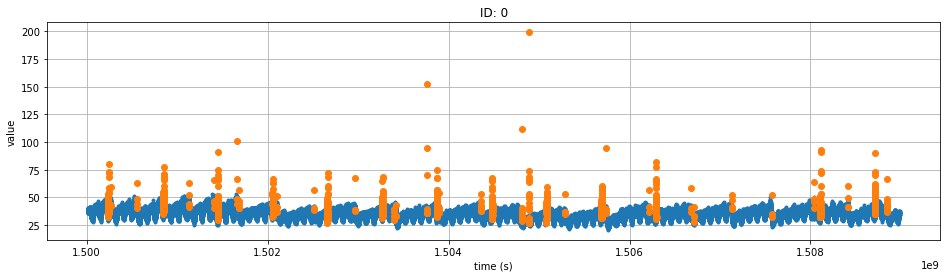

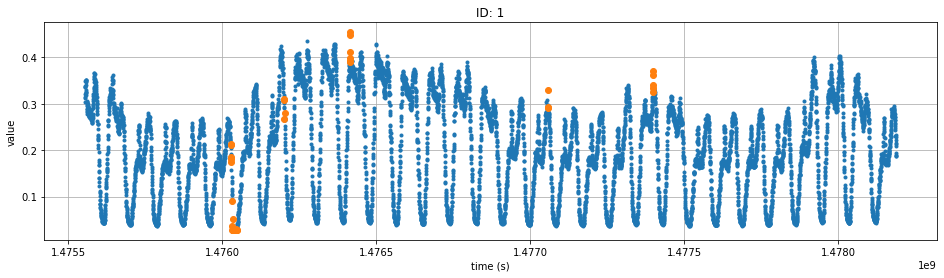

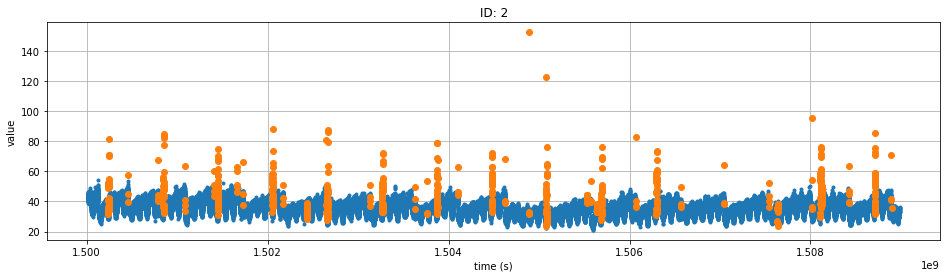

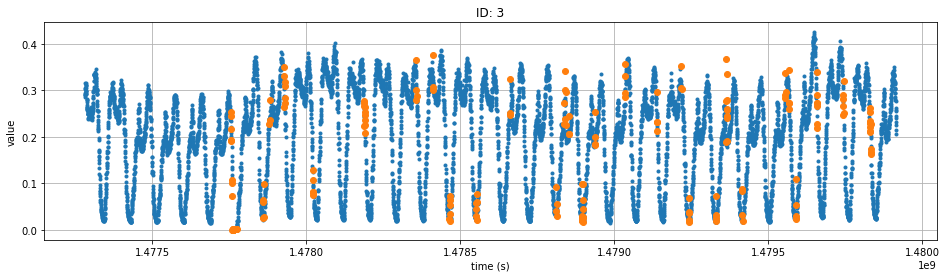

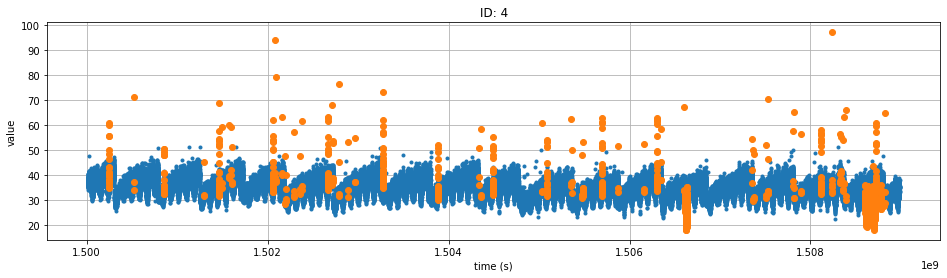

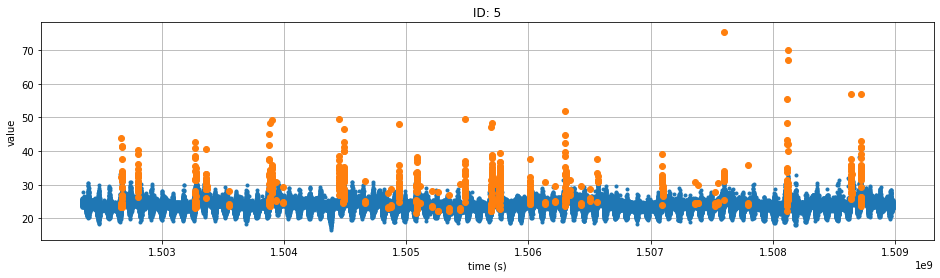

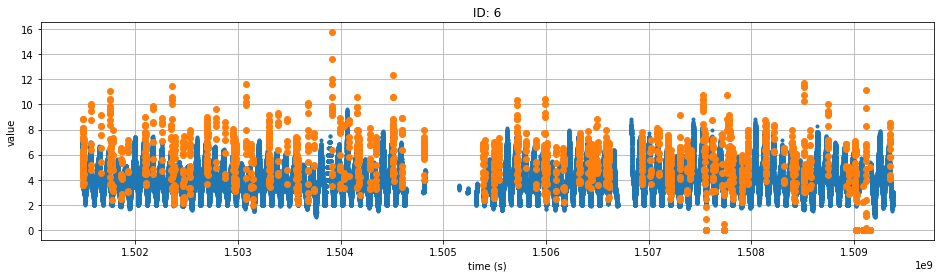

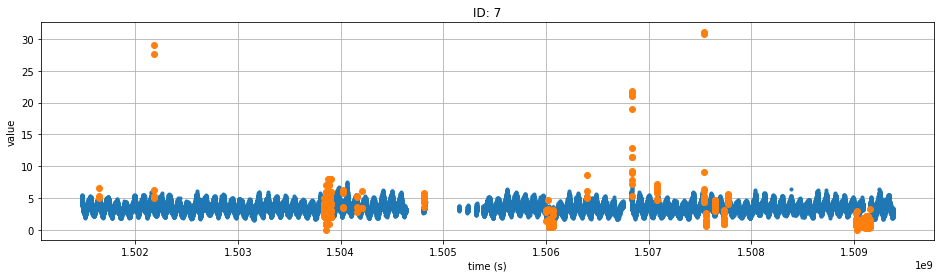

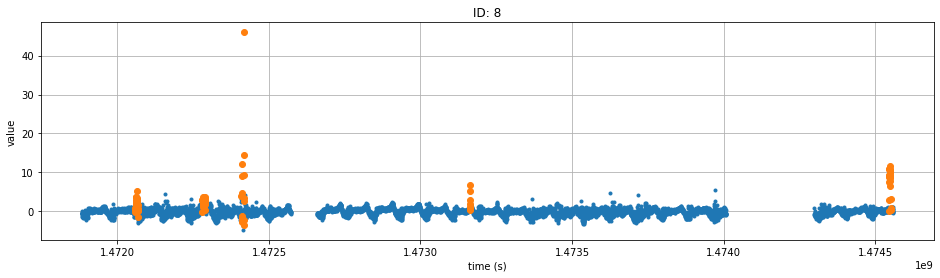

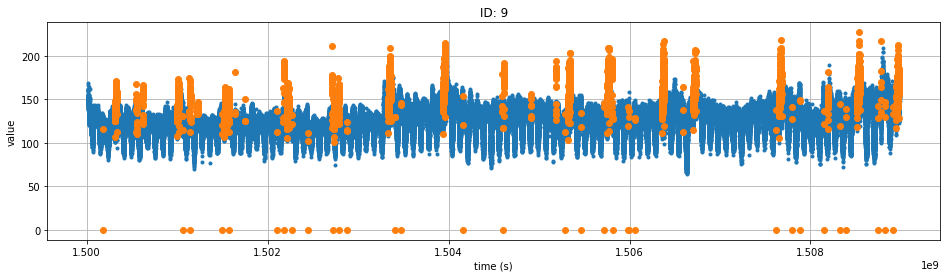

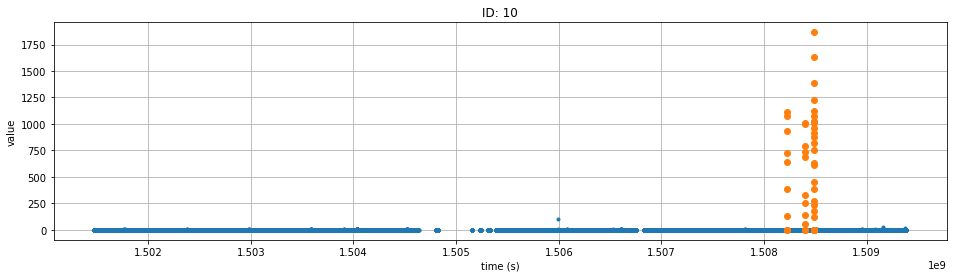

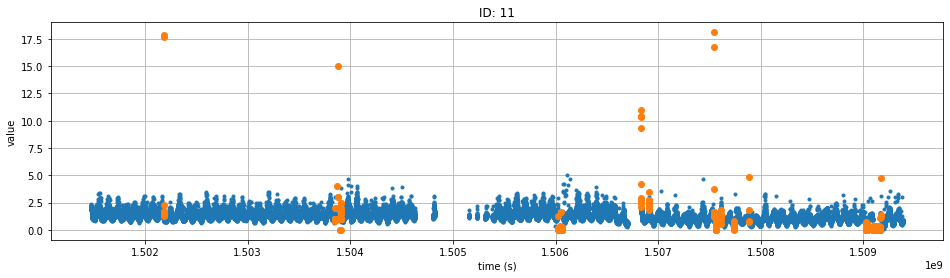

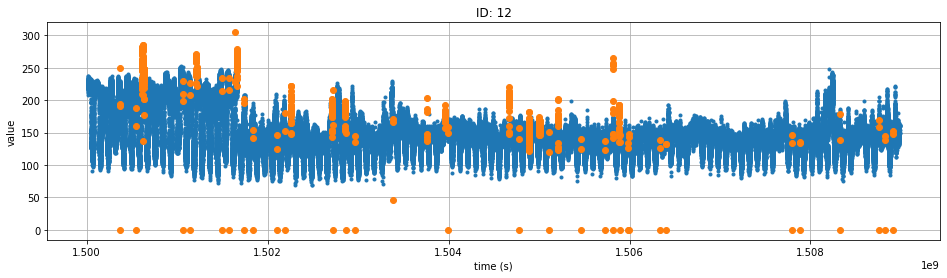

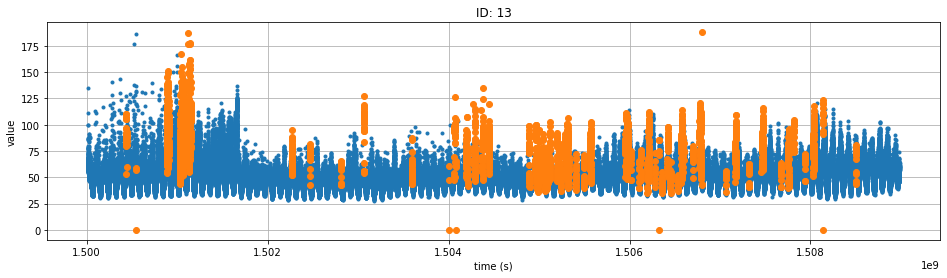

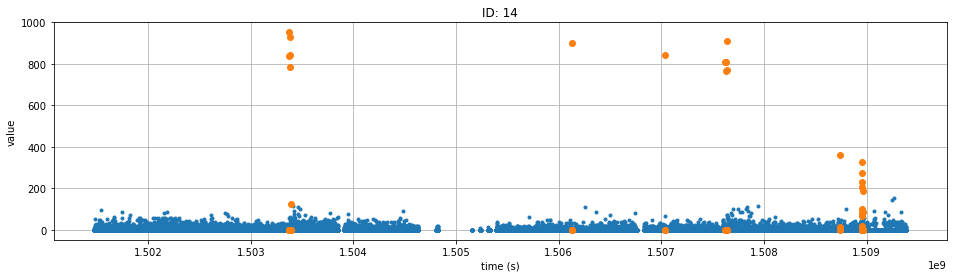

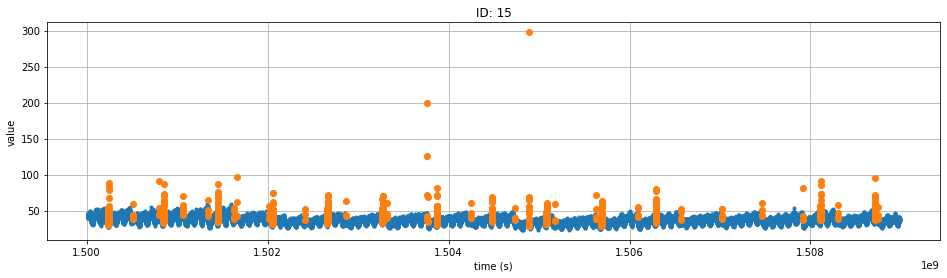

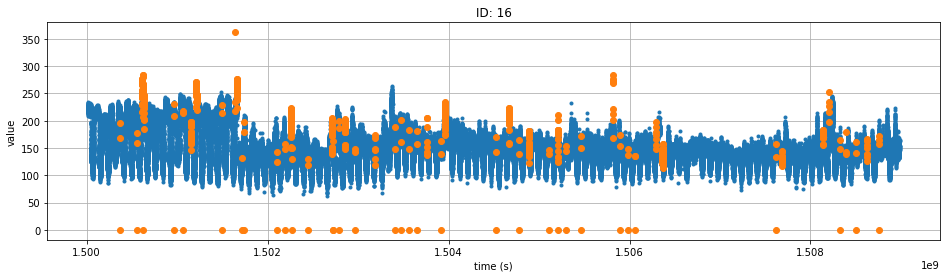

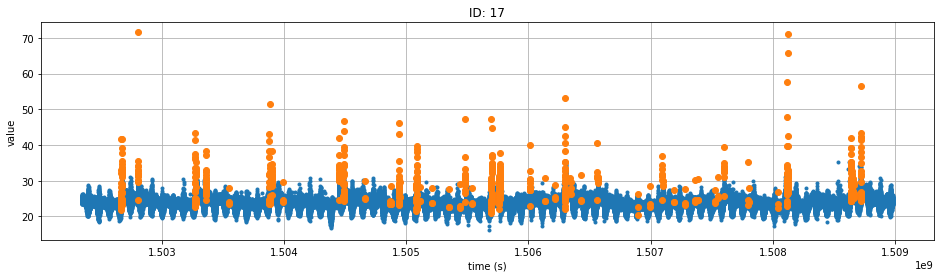

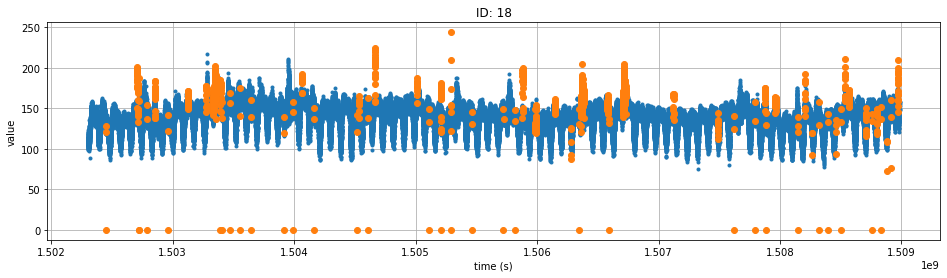

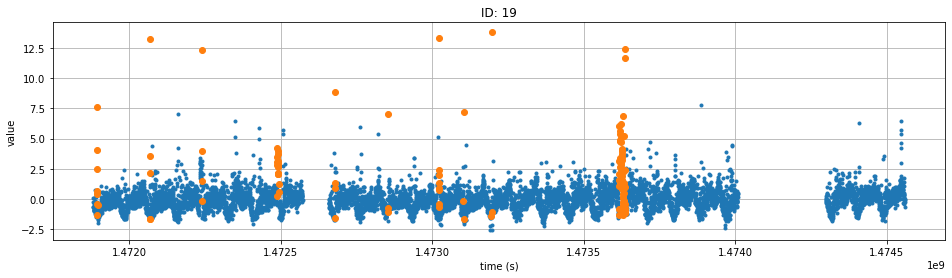

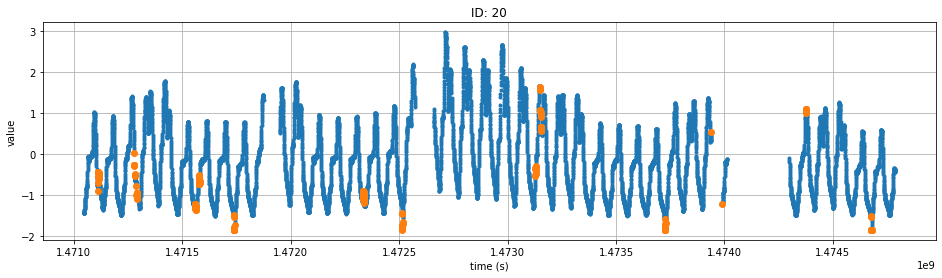

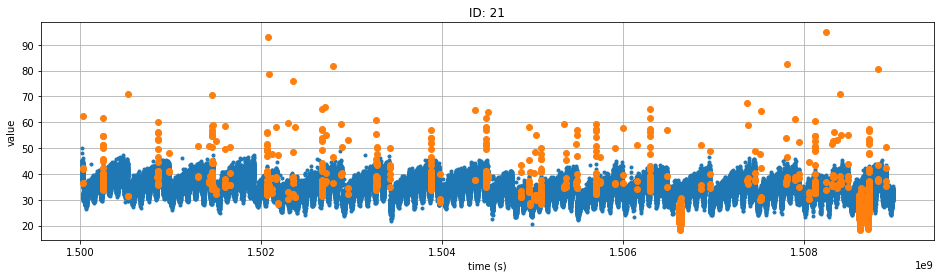

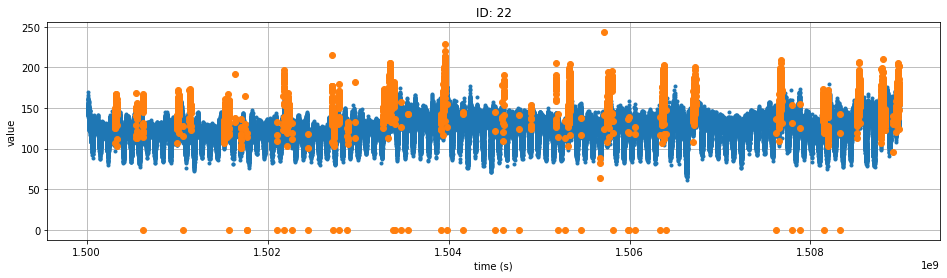

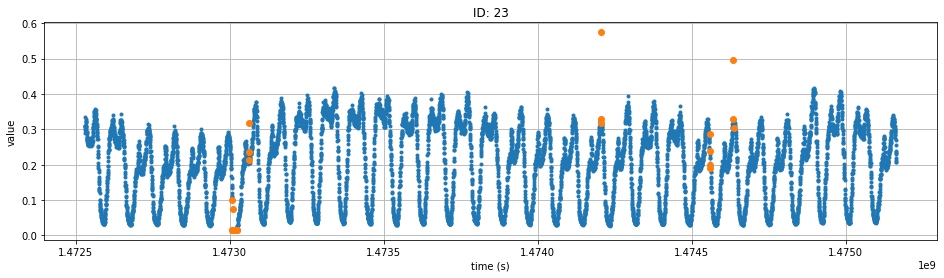

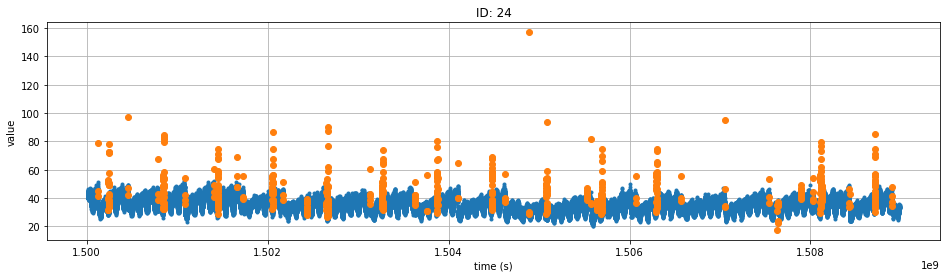

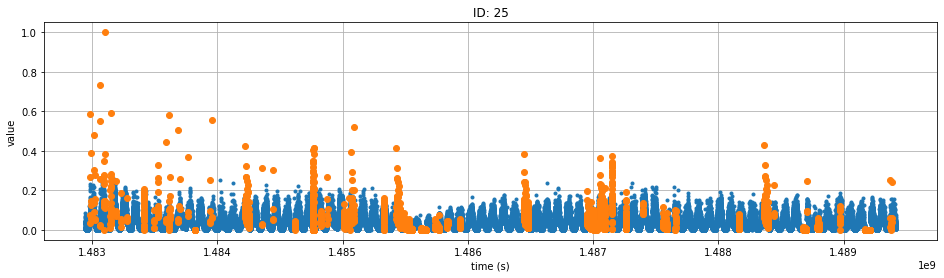

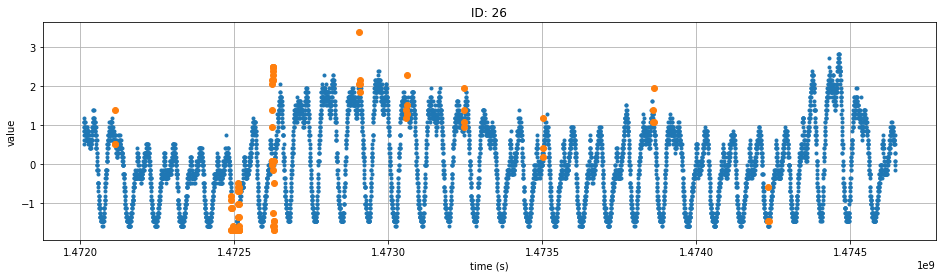

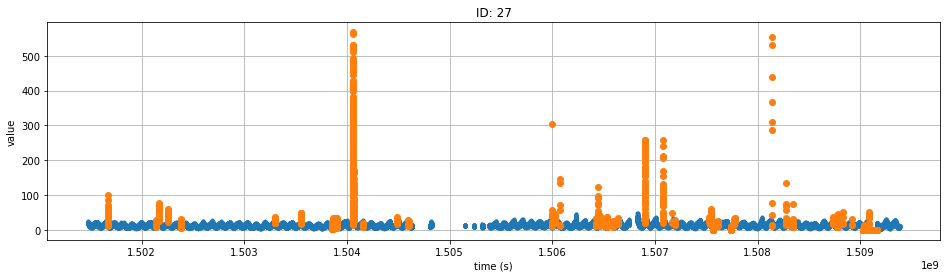

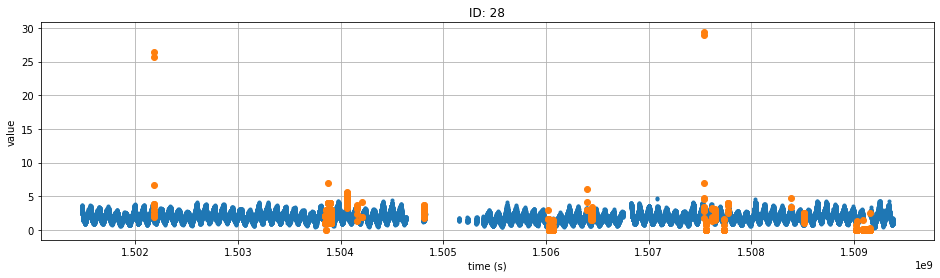

In [103]:
num = 0
for num in range(len(uuids)):
    uuid = uuids.index[num]
    df0 = df[df['KPI ID'] == uuid]
    timestamps = df0.timestamp.values
    diff = np.array(timestamps) - np.array(list(timestamps[1:]) + list(timestamps[-1:]))
    if len(diff[diff > -60]) > 1:
        print(f'{uuid} has {len(diff[diff > -60])} missing values')
    df0.to_csv(f'./data/{num}.csv')
    plot_anomaly(df0, num)
    num += 1

In [115]:
df_train = pd.read_csv('./data/phase2_train.csv')

In [116]:
df_train[df_train.label ==1]

,timestamp,value,label,KPI ID
2035,1476583140,0.040727,1,da10a69f-d836-3baa-ad40-3e548ecf1fbd
2036,1476583200,0.096183,1,da10a69f-d836-3baa-ad40-3e548ecf1fbd
2037,1476583260,0.085152,1,da10a69f-d836-3baa-ad40-3e548ecf1fbd
2038,1476583320,0.073104,1,da10a69f-d836-3baa-ad40-3e548ecf1fbd
2039,1476583380,0.083456,1,da10a69f-d836-3baa-ad40-3e548ecf1fbd
...,...,...,...,...
3000341,1499778480,69.180000,1,42d6616d-c9c5-370a-a8ba-17ead74f3114
3000342,1499778540,43.010000,1,42d6616d-c9c5-370a-a8ba-17ead74f3114
3001209,1499833020,41.650000,1,42d6616d-c9c5-370a-a8ba-17ead74f3114
3001210,1499833080,62.010000,1,42d6616d-c9c5-370a-a8ba-17ead74f3114


In [117]:
df_train.groupby(by='KPI ID').count()

,timestamp,value,label
KPI ID,,,
05f10d3a-239c-3bef-9bdc-a2feeb0037aa,146255,146255,146255
0efb375b-b902-3661-ab23-9a0bb799f4e3,8784,8784,8784
1c6d7a26-1f1a-3321-bb4d-7a9d969ec8f0,146254,146254,146254
301c70d8-1630-35ac-8f96-bc1b6f4359ea,8784,8784,8784
42d6616d-c9c5-370a-a8ba-17ead74f3114,146253,146253,146253
43115f2a-baeb-3b01-96f7-4ea14188343c,108071,108071,108071
431a8542-c468-3988-a508-3afd06a218da,129046,129046,129046
4d2af31a-9916-3d9f-8a8e-8a268a48c095,128872,128872,128872
54350a12-7a9d-3ca8-b81f-f886b9d156fd,8866,8866,8866
